In [2]:
#pip install fairlearn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from shap.datasets import adult  # shap is only used its dataset utility
adult()[0].head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [5]:
import inspect
#Look at the function definition
print(inspect.getsource(adult))

def adult(display=False):
    """ Return the Adult census data in a nice package. """
    dtypes = [
        ("Age", "float32"), ("Workclass", "category"), ("fnlwgt", "float32"),
        ("Education", "category"), ("Education-Num", "float32"), ("Marital Status", "category"),
        ("Occupation", "category"), ("Relationship", "category"), ("Race", "category"),
        ("Sex", "category"), ("Capital Gain", "float32"), ("Capital Loss", "float32"),
        ("Hours per week", "float32"), ("Country", "category"), ("Target", "category")
    ]
    raw_data = pd.read_csv(
        cache(github_data_url + "adult.data"),
        names=[d[0] for d in dtypes],
        na_values="?",
        dtype=dict(dtypes)
    )
    data = raw_data.drop(["Education"], axis=1)  # redundant with Education-Num
    filt_dtypes = list(filter(lambda x: not (x[0] in ["Target", "Education"]), dtypes))
    data["Target"] = data["Target"] == " >50K"
    rcode = {
        "Not-in-family": 0,
        "Unmarried": 1,
      

In [6]:
X, y_true = adult(display=True) #Raw dataset
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [7]:
X, y_true = adult(display=False) #Factorize the cats
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [8]:
print(y_true)
y_true = y_true * 1 #convert y to bianry numeric
print(y_true)

[False False False ... False False  True]
[0 0 0 ... 0 0 1]


In [9]:
sex = X['Sex'].apply(lambda sex: "female" if sex == 0 else "male") #convert sex to male/female
sex

0          male
1          male
2          male
3          male
4        female
          ...  
32556    female
32557      male
32558    female
32559      male
32560    female
Name: Sex, Length: 32561, dtype: object

<BarContainer object of 2 artists>

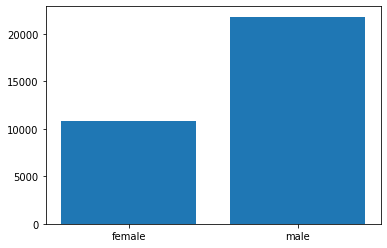

In [10]:
import matplotlib.pyplot as plt
dfgroup = pd.DataFrame(sex).groupby(['Sex'])['Sex'].count()
plt.bar(['female','male'], dfgroup)

In [11]:
from fairlearn.metrics import group_summary
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X, y_true)

y_pred = classifier.predict(X)
group_summary(accuracy_score, y_true, y_pred, sensitive_features=sex)

{'overall': 0.976413500813857,
 'by_group': {'female': 0.9958221149382601, 'male': 0.9668196420376319}}

In [12]:
#If this does not work try in chrome
from fairlearn.widget import FairlearnDashboard
FairlearnDashboard(sensitive_features=sex,
                       sensitive_feature_names=['sex'],
                       y_true=y_true,
                       y_pred={"initial model": y_pred})

FairlearnWidget(value={'true_y': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1…

In [13]:
from fairlearn.metrics import selection_rate_group_summary
selection_rate_group_summary(y_true, y_pred, sensitive_features=sex)

{'overall': 0.2249623783053346,
 'by_group': {'female': 0.1065824900194968, 'male': 0.28347865993575033}}